In [1]:
# 분류모델 종류 - Logistic Regression,SGD,KNN,SVM,Decision Tree, Random Forest, LGBMClassifier
# 최적화 - lgbm ,smote(imbalanced), outlier제거, scaler,randomsearch
# 평가지표 - classification_report, f1_score, roc_auc_score(predic_proba)

# 모델을 만들 data 를 merge. 
# 라벨값을 바이너리로 만들어줌 
# 트레인 테스트 데이터셋을 분리 
# 모델을 만들 반복문 돌리기
# 최적화하고 모델 다시 만들어서 차이를 비교 
# 피쳐임포턴스를 확인한 후에 피쳐를 뽑아내서 다시 반복 

In [2]:
##### 여러개 데이터프레임 merge 하기

# from functools import reduce
# import pandas as pd
# dfs = [df_coldwave, df_kr, df_near]
# cold_kr_near = reduce(lambda left, right: pd.merge(left,right,left_index=True, right_index=True), dfs)

In [3]:
##### Feature importance 시각화 하기 

# model =[rfc, dtc, lgbm]
# for i in model:
#     # 배열형태로 반환
#     ft_importance_values = i.feature_importances_

# # 정렬과 시각화를 쉽게 하기 위해 series 전환
#     ft_series = pd.Series(ft_importance_values, index = x_train.columns)
#     ft_top20 = ft_series.sort_values(ascending=False)[:20]

# # 시각화
#     plt.figure(figsize=(8,6))
#     plt.title('{} Feature Importance Top 20'.format(i))
#     sns.barplot(x=ft_top20, y=ft_top20.index)
#     plt.show()
#     print('-'*50)

In [4]:
##### 랜덤포레스트 모델의 하이퍼파라미터를 랜덤서치로 최적의 값 찾기 .

# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# est = RandomForestClassifier(n_jobs=-1, n_estimators=500)
# rf_p_dist = {'max_depth':[3,5,10,None],
#                 'n_estimators':[100,200,300,400,500],
#                 'max_features':randint(1,3),
#                 'criterion':['gini','entropy'],
#                 'bootstrap':['True','False'],
#                 'min_samples_leaf':randint(1,4)}

# def hypertuning_rscv(est,p_distr, nbr_iter,x,y):
#     rdmserch = RandomizedSearchCV(est,param_distributions=p_distr,
#                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    
#     rdmserch.fit(x,y)
#     ht_params = rdmserch.best_params_
#     ht_score = rdmserch.best_score_
#     return ht_params, ht_score

# rf_parameters,rf_ht_score = hypertuning_rscv(est,rf_p_dist,40,x,y)

# y_pred = rfc.predict(x_test)

# # classifier=RandomForestClassifier

# # 교차검증하기 

# from sklearn.model_selection import cross_val_score
# cross_val = cross_val_score(rfc,x,y,cv=10,scoring='accuracy').mean()

#### 전처리와 모델링할때 쓸 모듈 import 

In [5]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os
from functools import reduce
import warnings 
warnings.filterwarnings('ignore')

# 분류모델 import 
# Logistic Regression,SGD,KNN,SVM,Decision Tree, Random Forest, LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,roc_auc_score,f1_score

lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC(probability=True)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lgbm = LGBMClassifier()

#### train, validation, test 데이터 분리하기 

In [6]:
# 데이터 불러오기
열대야 = pd.read_csv('./data/ML_preprocessed/열대야.csv',encoding='cp949',index_col=0)
고층기후 = pd.read_csv('./data/ML_preprocessed/고층기후.csv',encoding='cp949',index_col=0)
주변국기후 = pd.read_csv('./data/ML_preprocessed/주변국기후.csv',encoding='cp949',index_col=0)
폭염 = pd.read_csv('./data/ML_preprocessed/폭염.csv',encoding='cp949',index_col=0)
한국기후 = pd.read_csv('./data/ML_preprocessed/한국기후.csv',encoding='cp949',index_col=0)
한파 = pd.read_csv('./data/ML_preprocessed/한파.csv',encoding='cp949',index_col=0)
해상기후 = pd.read_csv('./data/ML_preprocessed/해상기후.csv',encoding='cp949',index_col=0)

# 데이터를 나누기 위해 인덱스를 일시로 해줌 
열대야.set_index('일시',inplace=True)
주변국기후.set_index('일시',inplace=True)
폭염.set_index('일시',inplace=True)
한국기후.set_index('일시',inplace=True)
한파.set_index('일시',inplace=True)
해상기후.set_index('일시',inplace=True)

# test 할 데이터 
열대야2019 = 열대야.loc['2019-01-01':'2019-12-31']
한파2019 = 한파.loc['2019-01-01':'2019-12-31']
폭염2019 = 폭염.loc['2019-01-01':'2019-12-31']
주변국기후2019 = 주변국기후.loc['2019-01-01':'2019-12-31']
한국기후2019 = 한국기후.loc['2019-01-01':'2019-12-31']
해상기후2019 = 해상기후.loc['2019-01-01':'2019-12-31']
고층기후2019 = 고층기후.loc['2019-01-01':'2019-12-31']

#train,validation 할 데이터 
열대야2019drop = 열대야.drop(열대야2019.index,axis=0)
한파2019drop = 한파.drop(한파2019.index,axis=0)
폭염2019drop = 폭염.drop(폭염2019.index,axis=0)
주변국기후2019drop = 주변국기후.drop(주변국기후2019.index,axis=0)
한국기후2019drop = 한국기후.drop(한국기후2019.index,axis=0)
해상기후2019drop = 해상기후.drop(해상기후2019.index,axis=0)
고층기후2019drop = 고층기후.drop(고층기후2019.index,axis=0)

In [7]:
# 주변국 데이터 군집 일시 제거 ㅅㅂ 
주변국기후2019.filter(like='일시').columns
주변국기후2019.drop(['n1일시', 'n2일시', 'n3일시', 'n4일시', 'n5일시', 'n6일시', 'n7일시'],axis=1,inplace=True)
주변국기후2019drop.drop(['n1일시', 'n2일시', 'n3일시', 'n4일시', 'n5일시', 'n6일시', 'n7일시'],axis=1,inplace=True)

#### 열대야 + 한국기후 조합 

In [8]:
# 전처리

# 일시 컬럼으로 merge 하기 위해 일시로 설정된 index를 다시 reset해줌 (근데 merge할때 index로 합치면 되는데 굳이;)
열대야2019drop = 열대야2019drop.reset_index()
한국기후2019drop = 한국기후2019drop.reset_index()

# 일시컬럼을 기준으로 한국기후 날짜에 merge (한국기후는 1990년, 열대야는 1973부터 시작.)
trop_kr = pd.merge(열대야2019drop,한국기후2019drop,on='일시',how='right')

# 서로 겹치지 않는 날짜를 제거하기위해 index를 일시로 설정하고, loc를 사용하여 겹치지 않는 날짜 제거 
trop_kr=trop_kr.set_index('일시')
trop_kr=trop_kr.drop(trop_kr.loc['2021-09-01':'2021-12-31'].index)

# 타겟값을 바이너리로 만들어줌 
trop_kr['재난일어난날'] = trop_kr['재난일어난날'].fillna(0)
trop_kr['재난일어난날'] = trop_kr['재난일어난날'].apply(lambda x: x if str(x) == '0' else '1')

# 타겟날짜를 2주뒤로 shift 해줌 
trop_kr['재난일어난날'] = trop_kr['재난일어난날'].shift(periods=14, axis=0)

# 2주뒤로 shift 한만큼 생긴 nan값을 제거해줌 
trop_kr.dropna(inplace=True)

# 재난일어난날 컬럼이 object로 되어있으니 뉴메릭으로 바꿔줌
trop_kr['재난일어난날'] = trop_kr['재난일어난날'].astype(int)

# 모델링 할 데이터준비완료

In [9]:
# 열대야 + 한국기후 조합 데이터 모델링 #

# x,y 설정
y = trop_kr.재난일어난날
x = trop_kr.drop('재난일어난날',axis=1)

# 트레인 테스트 셋 분리 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# 분류 모델 돌리기 
models = [lr,dtc,lgbm,rfc,svm,knn]

for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    proba = i.predict_proba(x_test)[:,1]
    
    print(i.__class__.__name__)
    print(classification_report(y_test,pred))
    print('roc_auc_score :',roc_auc_score(y_test,proba))
    print('-'*50)
    

LogisticRegression
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2009
           1       0.60      0.42      0.49       229

    accuracy                           0.91      2238
   macro avg       0.77      0.69      0.72      2238
weighted avg       0.90      0.91      0.91      2238

roc_auc_score : 0.9402209706973641
--------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2009
           1       0.55      0.56      0.56       229

    accuracy                           0.91      2238
   macro avg       0.75      0.76      0.75      2238
weighted avg       0.91      0.91      0.91      2238

roc_auc_score : 0.7557758645049243
--------------------------------------------------
LGBMClassifier
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2009
        

In [10]:
# 최적화 하기 

# x_train, x_test스케일링 
# 임밸런스한 데이터 smote 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

import imblearn
from imblearn.over_sampling import SMOTE
smote =SMOTE(random_state=0)
x_train_sm, y_train_sm =smote.fit_resample(x_train_scaled,y_train)

# 최적화한 데이터로 분류 모델 돌리기 
models = [lr,dtc,lgbm,rfc,svm,knn]

for i in models:
    i.fit(x_train_sm,y_train_sm)
    pred = i.predict(x_test_scaled)
    proba = i.predict_proba(x_test_scaled)[:,1]
    
    print(i.__class__.__name__)
    print(classification_report(y_test,pred))
    print('roc_auc_score :',roc_auc_score(y_test,proba))
    print('-'*50)

LogisticRegression
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2009
           1       0.49      0.92      0.64       229

    accuracy                           0.89      2238
   macro avg       0.74      0.90      0.79      2238
weighted avg       0.94      0.89      0.91      2238

roc_auc_score : 0.96014441563184
--------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2009
           1       0.49      0.59      0.53       229

    accuracy                           0.89      2238
   macro avg       0.72      0.76      0.74      2238
weighted avg       0.90      0.89      0.90      2238

roc_auc_score : 0.761104505706852
--------------------------------------------------
LGBMClassifier
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2009
           

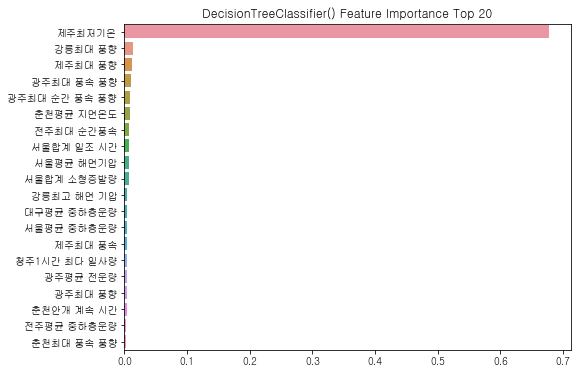

--------------------------------------------------


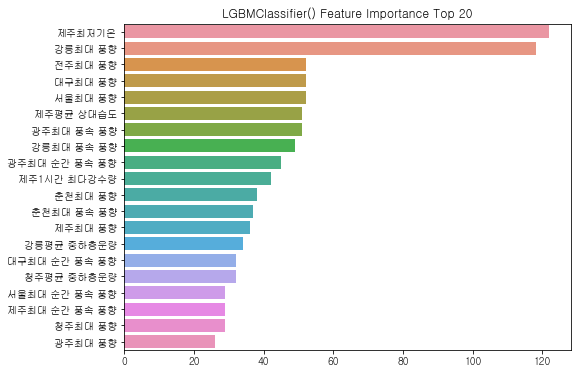

--------------------------------------------------


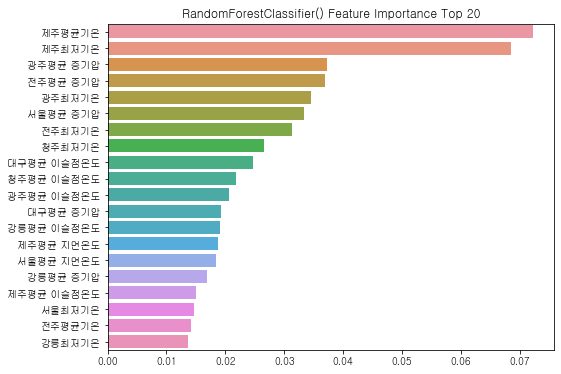

--------------------------------------------------


In [11]:
#### Feature importance 시각화 하기 

model = [dtc,lgbm,rfc]
for i in model:
    # 배열형태로 반환
    ft_importance_values = i.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
    ft_series = pd.Series(ft_importance_values, index = x_train.columns)
    ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
    plt.figure(figsize=(8,6))
    plt.title('{} Feature Importance Top 20'.format(i))
    sns.barplot(x=ft_top20, y=ft_top20.index)
    plt.show()
    print('-'*50)

In [12]:
#### feature importance로 확인한 feature를 뽑아서 rfc와 lgbm 돌려보기 

# rfc의 feature_importance
ft_importance_values =rfc.feature_importances_
ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

ft_top20 # 탑20피쳐임포턴스확인

trop_kr_rfc = trop_kr.loc[:,['재난일어난날','제주최저기온',     '제주평균기온',     '전주최저기온',        '광주평균 증기압',     
                       '광주최저기온','대구평균 증기압','청주평균 이슬점온도','청주평균기온',
                            '대구평균 이슬점온도',   '서울평균기온' ,      '광주평균기온',       '제주평균 이슬점온도',    
                            '청주최저기온'   ,    '전주평균 증기압',   '전주평균기온',        
                            '서울평균 증기압',   '제주평균 증기압',     '서울최저기온'   ,    '춘천평균 증기압',     
                            '청주평균 증기압']]

rfc_y = trop_kr_rfc['재난일어난날']
rfc_x = trop_kr_rfc.drop('재난일어난날',axis=1)

rfc_x_train,rfc_x_test,rfc_y_train,rfc_y_test=train_test_split(rfc_x,rfc_y,test_size=0.2,random_state=0)

# 최적화 하기전 돌려보기
rfc.fit(rfc_x_train,rfc_y_train)
pred = rfc.predict(rfc_x_test)
proba = rfc.predict_proba(rfc_x_test)[:,1]
    
print(classification_report(rfc_y_test,pred))
print('roc_auc_score :',roc_auc_score(rfc_y_test,proba))
print('-'*50)

# 최적화하기
scaler.fit(rfc_x_train)
rfc_x_train_scaled = scaler.transform(rfc_x_train)
rfc_x_test_scaled = scaler.transform(rfc_x_test)

smote =SMOTE(random_state=0)
rfc_x_train_sm, rfc_y_train_sm =smote.fit_resample(rfc_x_train_scaled,rfc_y_train)
# 분류 모델 돌리기 

rfc.fit(rfc_x_train_sm,rfc_y_train_sm)
pred = rfc.predict(rfc_x_test_scaled)
proba = rfc.predict_proba(rfc_x_test_scaled)[:,1]
    
print(classification_report(rfc_y_test,pred))
print('roc_auc_score :',roc_auc_score(rfc_y_test,proba))
print('-'*50)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2009
           1       0.66      0.47      0.55       229

    accuracy                           0.92      2238
   macro avg       0.80      0.72      0.75      2238
weighted avg       0.91      0.92      0.92      2238

roc_auc_score : 0.9491686971945025
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2009
           1       0.54      0.79      0.64       229

    accuracy                           0.91      2238
   macro avg       0.76      0.86      0.80      2238
weighted avg       0.93      0.91      0.92      2238

roc_auc_score : 0.9538365564566438
--------------------------------------------------


In [13]:
# lgbm feature importance 모델 돌려보기 
# lgbm의 feature_importance
ft_importance_values =lgbm.feature_importances_
ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

ft_top20

trop_kr_lgbm = trop_kr.loc[:,['재난일어난날','제주최저기온',           '강릉최대 풍향',          '전주최대 풍향',           
'대구최대 풍향',           '서울최대 풍향',           
'제주평균 상대습도',         '광주최대 풍속 풍향',        '강릉최대 풍속 풍향',        '광주최대 순간 풍속 풍향',     '제주1시간 최다강수량',       
'춘천최대 풍향',           '춘천최대 풍속 풍향',        '제주최대 풍향',           '강릉평균 중하층운량',        '대구최대 순간 풍속 풍향',     
'청주평균 중하층운량',        '서울최대 순간 풍속 풍향',     '제주최대 순간 풍속 풍향',     '청주최대 풍향',           '광주최대 풍향']]

lgbm_y = trop_kr_lgbm['재난일어난날']
lgbm_x = trop_kr_lgbm.drop('재난일어난날',axis=1)

lgbm_x_train,lgbm_x_test,lgbm_y_train,lgbm_y_test=train_test_split(lgbm_x,lgbm_y,test_size=0.2,random_state=0)
# 최적화 하기전 돌려보기
lgbm.fit(lgbm_x_train,lgbm_y_train)
pred = lgbm.predict(lgbm_x_test)
proba = lgbm.predict_proba(lgbm_x_test)[:,1]
    
print(classification_report(lgbm_y_test,pred))
print('roc_auc_score :',roc_auc_score(lgbm_y_test,proba))
print('-'*50)
    
#최적화하기
scaler.fit(rfc_x_train)
lgbm_x_train_scaled = scaler.transform(lgbm_x_train)
lgbm_x_test_scaled = scaler.transform(lgbm_x_test)

smote =SMOTE(random_state=0)
lgbm_x_train_sm, lgbm_y_train_sm =smote.fit_resample(lgbm_x_train_scaled,lgbm_y_train)
# 분류 모델 돌리기 

lgbm.fit(lgbm_x_train_sm,lgbm_y_train_sm)
pred = lgbm.predict(lgbm_x_test_scaled)
proba = lgbm.predict_proba(lgbm_x_test_scaled)[:,1]
    
print(classification_report(lgbm_y_test,pred))
print('roc_auc_score :',roc_auc_score(lgbm_y_test,proba))
print('-'*50)
    
#rfc랑 lgbm제일 높게나옴 

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2009
           1       0.67      0.48      0.56       229

    accuracy                           0.92      2238
   macro avg       0.81      0.73      0.76      2238
weighted avg       0.91      0.92      0.92      2238

roc_auc_score : 0.9541473848033195
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2009
           1       0.62      0.58      0.60       229

    accuracy                           0.92      2238
   macro avg       0.78      0.77      0.78      2238
weighted avg       0.92      0.92      0.92      2238

roc_auc_score : 0.9526519309395928
--------------------------------------------------


In [14]:
x_train

,서울평균기온,서울최저기온,서울최고기온,서울1시간 최다강수량,서울일강수량,서울최대 순간풍속,서울최대 순간 풍속 풍향,서울최대 풍속,서울최대 풍속 풍향,서울평균 풍속,...,제주합계 일사,제주일 최심신적설,제주일 최심적설,제주합계 3시간 신적설,제주평균 전운량,제주평균 중하층운량,제주평균 지면온도,제주합계 대형증발량,제주합계 소형증발량,제주안개 계속 시간
일시,,,,,,,,,,,,,,,,,,,,,
2017-04-16,18.7,12.9,24.4,0.0,0.0,6.3,180.0,3.8,270.0,1.4,...,23.42,0.0,0.0,0.0,5.1,4.1,22.8,3.000000,4.3,1.98
1995-03-23,8.1,6.5,9.2,0.0,0.8,7.9,70.0,3.3,70.0,2.4,...,0.80,0.0,0.0,0.0,5.3,2.1,17.0,2.614596,4.5,0.00
1998-12-29,1.0,-4.4,5.7,0.0,0.0,9.9,340.0,5.8,320.0,3.7,...,1.73,0.0,0.0,0.0,5.5,4.4,8.9,2.614596,1.3,0.00
2018-01-27,-9.9,-15.9,-3.5,0.0,0.0,5.8,180.0,3.4,270.0,1.4,...,11.37,0.0,0.1,0.0,8.4,6.1,3.3,1.300000,1.9,0.00
1999-04-12,11.2,8.7,13.8,5.9,17.9,8.7,250.0,6.0,250.0,2.2,...,8.50,0.0,0.0,0.0,9.4,6.4,13.3,1.800000,3.4,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-05-06,18.4,16.2,22.3,3.5,7.0,5.9,140.0,3.3,140.0,1.4,...,18.05,0.0,0.0,0.0,7.1,5.6,22.6,2.200000,3.1,3.25
1998-12-23,2.8,-0.8,7.0,0.0,0.0,7.3,340.0,6.7,340.0,2.5,...,10.48,0.0,0.0,0.0,3.6,3.1,10.4,2.614596,2.0,0.00
2016-12-29,-4.2,-7.2,-1.1,0.0,0.3,9.5,200.0,5.4,290.0,2.8,...,3.92,0.0,0.0,0.0,8.3,7.3,5.8,1.300000,1.9,0.00


#### 열대야 + 한국기후 + 주변국기후 + 해상기후 + 고층기후 조합 #

In [18]:
# 모든기후와 열대야 합치기 reduce ㅅㅂ 어케쓰는지몰라
trop_dfs = pd.merge(열대야2019drop,한국기후2019drop,on='일시',how='right')
trop_dfs = pd.merge(trop_dfs,주변국기후2019drop,on='일시',how='right')
trop_dfs = pd.merge(trop_dfs,해상기후2019drop,on='일시',how='left')
trop_dfs = pd.merge(trop_dfs,고층기후2019drop,on='일시',how='left')

# 타겟값을 바이너리로 ! 
trop_dfs['재난일어난날'] = trop_dfs['재난일어난날'].fillna(0)
trop_dfs['재난일어난날'] = trop_dfs['재난일어난날'].apply(lambda x: x if str(x) == '0' else '1')

# 타겟날짜를 2주뒤로 shift 해줌 
trop_dfs['재난일어난날'] = trop_dfs['재난일어난날'].shift(periods=14, axis=0)

# 2주뒤로 shift 한만큼 생긴 nan값을 제거해줌 
trop_dfs.dropna(inplace=True)

# 재난일어난날 컬럼이 object로 되어있으니 뉴메릭으로 바꿔줌
trop_dfs['재난일어난날'] = trop_dfs['재난일어난날'].astype(int)

trop_dfs.set_index('일시',inplace=True)

In [19]:
# 모델 돌리기 

# x,y 설정
y = trop_dfs.재난일어난날
x = trop_dfs.drop('재난일어난날',axis=1)

# 트레인 테스트 셋 분리 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# 분류 모델 돌리기 
models = [lr,dtc,lgbm,rfc,svm,knn]

for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    proba = i.predict_proba(x_test)[:,1]
    
    print(i.__class__.__name__)
    print(classification_report(y_test,pred))
    print('roc_auc_score :',roc_auc_score(y_test,proba))
    print('-'*50)
    

LogisticRegression
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1604
           1       0.68      0.46      0.55       196

    accuracy                           0.92      1800
   macro avg       0.81      0.72      0.75      1800
weighted avg       0.91      0.92      0.91      1800

roc_auc_score : 0.9335430556262405
--------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1604
           1       0.64      0.61      0.62       196

    accuracy                           0.92      1800
   macro avg       0.79      0.78      0.79      1800
weighted avg       0.92      0.92      0.92      1800

roc_auc_score : 0.7823744210901319
--------------------------------------------------
LGBMClassifier
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1604
        

In [20]:
# 최적화 하기 

# x_train, x_test스케일링 
# 임밸런스한 데이터 smote 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

import imblearn
from imblearn.over_sampling import SMOTE
smote =SMOTE(random_state=0)
x_train_sm, y_train_sm =smote.fit_resample(x_train_scaled,y_train)

# 최적화한 데이터로 분류 모델 돌리기 
models = [lr,dtc,lgbm,rfc,svm,knn]

for i in models:
    i.fit(x_train_sm,y_train_sm)
    pred = i.predict(x_test_scaled)
    proba = i.predict_proba(x_test_scaled)[:,1]
    
    print(i.__class__.__name__)
    print(classification_report(y_test,pred))
    print('roc_auc_score :',roc_auc_score(y_test,proba))
    print('-'*50)

    

LogisticRegression
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1604
           1       0.61      0.85      0.71       196

    accuracy                           0.92      1800
   macro avg       0.79      0.89      0.83      1800
weighted avg       0.94      0.92      0.93      1800

roc_auc_score : 0.9652717695557025
--------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1604
           1       0.53      0.59      0.56       196

    accuracy                           0.90      1800
   macro avg       0.74      0.76      0.75      1800
weighted avg       0.90      0.90      0.90      1800

roc_auc_score : 0.7638111354267393
--------------------------------------------------
LGBMClassifier
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1604
        

In [ ]:
#### Feature importance 시각화 하기 

model = [dtc,lgbm,rfc]
for i in model:
    # 배열형태로 반환
    ft_importance_values = i.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
    ft_series = pd.Series(ft_importance_values, index = x_train.columns)
    ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
    plt.figure(figsize=(8,6))
    plt.title('{} Feature Importance Top 20'.format(i))
    sns.barplot(x=ft_top20, y=ft_top20.index)
    plt.show()
    print('-'*50)

#### 열대야 2019년도 데이터로 밸리데이션 

In [ ]:
# 모든기후와 열대야 합치기 reduce ㅅㅂ 어케쓰는지몰라
trop_dfs2019 = pd.merge(열대야2019,한국기후2019,on='일시',how='right')
trop_dfs2019 = pd.merge(trop_dfs2019,주변국기후2019,on='일시',how='right')
trop_dfs2019 = pd.merge(trop_dfs2019,해상기후2019,on='일시',how='left')
trop_dfs2019 = pd.merge(trop_dfs2019,고층기후2019,on='일시',how='left')

# 타겟값을 바이너리로 ! 
trop_dfs2019['재난일어난날'] = trop_dfs2019['재난일어난날'].fillna(0)
trop_dfs2019['재난일어난날'] = trop_dfs2019['재난일어난날'].apply(lambda x: x if str(x) == '0' else '1')

# 타겟날짜를 2주뒤로 shift 해줌 
trop_dfs2019['재난일어난날'] = trop_dfs2019['재난일어난날'].shift(periods=14, axis=0)

# 2주뒤로 shift 한만큼 생긴 nan값을 제거해줌 
trop_dfs2019.dropna(inplace=True)

# 재난일어난날 컬럼이 object로 되어있으니 뉴메릭으로 바꿔줌
trop_dfs2019['재난일어난날'] = trop_dfs2019['재난일어난날'].astype(int)

In [ ]:
# 모델 돌리기 

# x,y 설정
y = trop_dfs2019.재난일어난날
x = trop_dfs2019.drop('재난일어난날',axis=1)

# 트레인 테스트 셋 분리 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# 분류 모델 돌리기 
models = [lr,dtc,lgbm,rfc,svm,knn]

for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    proba = i.predict_proba(x_test)[:,1]
    
    print(i.__class__.__name__)
    print(classification_report(y_test,pred))
    print('roc_auc_score :',roc_auc_score(y_test,proba))
    print('-'*50)

In [ ]:
# 최적화 하기 

# x_train, x_test스케일링 
# 임밸런스한 데이터 smote 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

import imblearn
from imblearn.over_sampling import SMOTE
smote =SMOTE(random_state=0)
x_train_sm, y_train_sm =smote.fit_resample(x_train_scaled,y_train)

# 최적화한 데이터로 분류 모델 돌리기 
models = [lr,dtc,lgbm,rfc,svm,knn]

for i in models:
    i.fit(x_train_sm,y_train_sm)
    pred = i.predict(x_test_scaled)
    proba = i.predict_proba(x_test_scaled)[:,1]
    
    print(i.__class__.__name__)
    print(classification_report(y_test,pred))
    print('roc_auc_score :',roc_auc_score(y_test,proba))
    print('-'*50)

#### 모든기후와 한파 조합

In [21]:
# coldwave_dfs2019 = coldwave_dfs.drop(coldwave_dfs.loc['2019-01-01':'2019-12-31'].index)
# coldwave_dfs.reset_index(inplace=True)
# coldwave_dfs['일시'] = coldwave_dfs['일시'].astype(str)
# coldwave_dfs2019.set_index('일시',inplace=True)

In [22]:
# 모든기후와 한파 합치기 reduce ㅅㅂ 어케쓰는지몰라
coldwave_dfs = pd.merge(한파2019drop,한국기후2019drop,on='일시',how='right')
coldwave_dfs = pd.merge(coldwave_dfs,주변국기후2019drop,on='일시',how='right')
coldwave_dfs = pd.merge(coldwave_dfs,해상기후2019drop,on='일시',how='left')
coldwave_dfs = pd.merge(coldwave_dfs,고층기후2019drop,on='일시',how='left')

# 타겟값을 바이너리로 ! 
coldwave_dfs['재난일어난날'] = coldwave_dfs['재난일어난날'].fillna(0)
coldwave_dfs['재난일어난날'] = coldwave_dfs['재난일어난날'].apply(lambda x: x if str(x) == '0' else '1')

# 타겟날짜를 2주뒤로 shift 해줌 
coldwave_dfs['재난일어난날'] = coldwave_dfs['재난일어난날'].shift(periods=14, axis=0)

# 2주뒤로 shift 한만큼 생긴 nan값을 제거해줌 
coldwave_dfs.dropna(inplace=True)

# 재난일어난날 컬럼이 object로 되어있으니 뉴메릭으로 바꿔줌
coldwave_dfs['재난일어난날'] = coldwave_dfs['재난일어난날'].astype(int)

# coldwave_dfs.set_index('일시',inplace=True)

In [25]:
# 한파 2019년 데이터 전처리
# 모든기후와 한파 합치기 reduce ㅅㅂ 어케쓰는지몰라
coldwave_dfs2019 = pd.merge(한파2019,한국기후2019,on='일시',how='right')
coldwave_dfs2019 = pd.merge(coldwave_dfs2019,주변국기후2019,on='일시',how='right')
coldwave_dfs2019 = pd.merge(coldwave_dfs2019,해상기후2019,on='일시',how='left')
coldwave_dfs2019 = pd.merge(coldwave_dfs2019,고층기후2019,on='일시',how='left')

# 타겟값을 바이너리로 ! 
coldwave_dfs2019['재난일어난날'] = coldwave_dfs2019['재난일어난날'].fillna(0)
coldwave_dfs2019['재난일어난날'] = coldwave_dfs2019['재난일어난날'].apply(lambda x: x if str(x) == '0' else '1')

# 타겟날짜를 2주뒤로 shift 해줌 
coldwave_dfs2019['재난일어난날'] = coldwave_dfs2019['재난일어난날'].shift(periods=14, axis=0)

# 2주뒤로 shift 한만큼 생긴 nan값을 제거해줌 
coldwave_dfs2019.dropna(inplace=True)

# 재난일어난날 컬럼이 object로 되어있으니 뉴메릭으로 바꿔줌
coldwave_dfs2019['재난일어난날'] = coldwave_dfs2019['재난일어난날'].astype(int)

coldwave_dfs.set_index('일시',inplace=True)

In [26]:
# 모델 돌리기 

# x,y 설정
y = coldwave_dfs.재난일어난날
x = coldwave_dfs.drop('재난일어난날',axis=1)


# 트레인 테스트 셋 분리 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


# 분류 모델 돌리기 
models = [lr,dtc,lgbm,rfc,svm,knn]

for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    proba = i.predict_proba(x_test)[:,1]
    
    print(i.__class__.__name__)
    print(classification_report(y_test,pred))
    print('roc_auc_score :',roc_auc_score(y_test,proba))
    print('-'*50)
    

LogisticRegression
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1599
           1       0.46      0.23      0.31       201

    accuracy                           0.88      1800
   macro avg       0.69      0.60      0.62      1800
weighted avg       0.86      0.88      0.87      1800

roc_auc_score : 0.9018509702892665
--------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1599
           1       0.43      0.48      0.45       201

    accuracy                           0.87      1800
   macro avg       0.68      0.70      0.69      1800
weighted avg       0.88      0.87      0.87      1800

roc_auc_score : 0.6994063453837753
--------------------------------------------------
LGBMClassifier
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1599
        

In [27]:
# 최적화 하기 

# x_train, x_test스케일링 
# 임밸런스한 데이터 smote 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

import imblearn
from imblearn.over_sampling import SMOTE
smote =SMOTE(random_state=0)
x_train_sm, y_train_sm =smote.fit_resample(x_train_scaled,y_train)

# 최적화한 데이터로 분류 모델 돌리기 
models = [lr,dtc,lgbm,rfc,svm,knn]

for i in models:
    i.fit(x_train_sm,y_train_sm)
    pred = i.predict(x_test_scaled)
    proba = i.predict_proba(x_test_scaled)[:,1]
    
    print(i.__class__.__name__)
    print(classification_report(y_test,pred))
    print('roc_auc_score :',roc_auc_score(y_test,proba))
    print('-'*50)

LogisticRegression
              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1599
           1       0.47      0.90      0.61       201

    accuracy                           0.87      1800
   macro avg       0.73      0.89      0.77      1800
weighted avg       0.93      0.87      0.89      1800

roc_auc_score : 0.9312536753381311
--------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1599
           1       0.41      0.54      0.47       201

    accuracy                           0.86      1800
   macro avg       0.68      0.72      0.70      1800
weighted avg       0.88      0.86      0.87      1800

roc_auc_score : 0.7229891816713804
--------------------------------------------------
LGBMClassifier
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1599
        

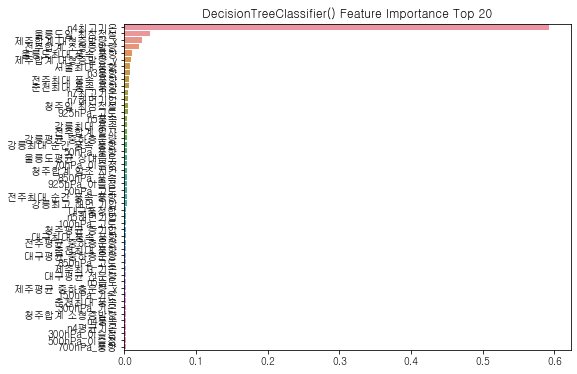

--------------------------------------------------


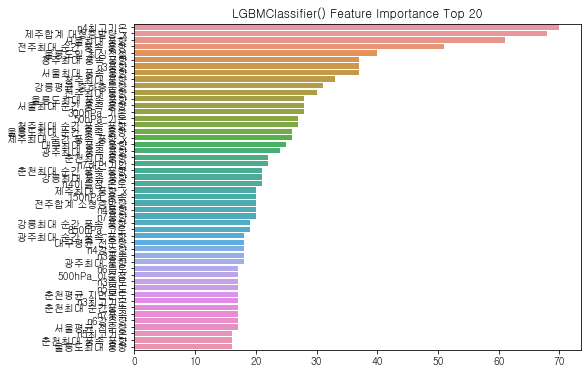

--------------------------------------------------


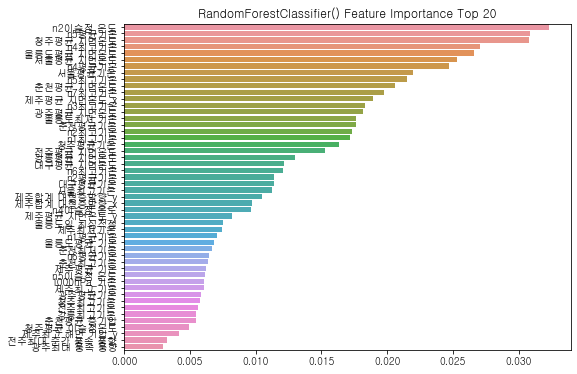

--------------------------------------------------


In [28]:
#### Feature importance 시각화 하기 

model = [dtc,lgbm,rfc]
for i in model:
    # 배열형태로 반환
    ft_importance_values = i.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
    ft_series = pd.Series(ft_importance_values, index = x_train.columns)
    ft_top20 = ft_series.sort_values(ascending=False)[:50]

# 시각화
    plt.figure(figsize=(8,6))
    plt.title('{} Feature Importance Top 20'.format(i))
    sns.barplot(x=ft_top20, y=ft_top20.index)
    plt.show()
    print('-'*50)

#### 한파모든기후조합 피쳐임포턴스 탑 20개 뽑아서 돌려보기 

In [29]:
# 피쳐임포턴스 20개 뽑기.. 
ft_importance_values = lgbm.feature_importances_
a = pd.DataFrame(ft_importance_values, index = x_train.columns)

b = a.sort_values(by=0,ascending=False)[:30]
b
b.index

Index(['n4최고기온', '제주합계 대형증발량_x', '서울최대 풍향', '전주최대 순간 풍속 풍향', '울릉도일 최심적설',
       '청주최대 풍속 풍향', 'n3풍향', '서울최대 풍속 풍향', '청주최대 풍향', '강릉평균 중하층운량', '전주최대 풍향',
       '울릉도최대 풍속 풍향', '서울최대 순간 풍속 풍향', '300hPa_기온', '50hPa_기온',
       '청주최대 순간 풍속 풍향', '울릉도최대 순간 풍속 풍향', '제주최대 순간 풍속 풍향_x', '대구최대 풍속 풍향',
       '광주최대 풍속 풍향', '춘천최대 풍향', 'n7해면기압', '춘천최대 순간 풍속 풍향', '강릉최대 풍속 풍향',
       'n4이슬점 온도', '제주최대 풍향_x', '150hPa_풍속', '전주합계 소형증발량', 'n4풍향', 'n7풍향'],
      dtype='object')

In [30]:
coldwave_dfs

,재난일어난날,서울평균기온,서울최저기온,서울최고기온,서울1시간 최다강수량,서울일강수량,서울최대 순간풍속,서울최대 순간 풍속 풍향,서울최대 풍속,서울최대 풍속 풍향,...,925hPa_고도,925hPa_기온,925hPa_이슬점,925hPa_풍향,925hPa_풍속,1000hPa_고도,1000hPa_기온,1000hPa_이슬점,1000hPa_풍향,1000hPa_풍속
일시,,,,,,,,,,,,,,,,,,,,,
1996-01-15,1,2.0,0.6,3.4,0.0,3.7,9.4,290.0,5.5,290.0,...,762.0,-3.200000,-4.450000,260.000000,9.750000,142.750000,0.00,-2.900000,251.25,7.000000
1996-01-16,1,-3.8,-7.4,0.6,0.0,0.0,11.0,320.0,6.3,320.0,...,799.5,-10.650000,-19.150000,305.000000,17.750000,194.250000,-6.50,-13.750000,307.50,10.750000
1996-01-17,0,-4.9,-8.1,-1.3,0.0,0.0,8.5,320.0,4.7,320.0,...,816.5,-10.050000,-16.575000,312.500000,14.500000,211.000000,-6.10,-14.600000,311.25,8.250000
1996-01-18,1,-3.9,-6.9,0.1,0.0,0.0,7.1,340.0,4.0,290.0,...,814.5,-9.300000,-20.800000,322.500000,7.750000,207.750000,-6.30,-14.550000,320.00,5.750000
1996-01-19,1,-2.5,-6.3,1.7,0.0,0.0,7.6,290.0,3.7,290.0,...,779.5,-7.200000,-15.100000,298.750000,13.250000,169.750000,-3.50,-11.175000,285.00,6.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,0,22.4,20.4,25.5,0.7,0.9,4.9,250.0,3.2,250.0,...,790.5,17.600000,15.700000,338.750000,12.750000,117.750000,21.05,20.000000,232.50,4.250000
2021-08-28,0,23.6,19.7,28.2,0.0,0.0,7.3,270.0,3.9,270.0,...,803.5,18.150000,14.775000,302.500000,8.000000,128.500000,21.30,18.250000,203.75,5.750000
2021-08-29,0,23.7,21.9,26.3,0.7,0.9,5.6,340.0,3.4,320.0,...,806.0,18.200000,15.025000,178.750000,8.250000,131.250000,21.85,19.800000,163.75,3.750000


In [31]:
coldwave_dfs50 = coldwave_dfs[['재난일어난날','n4최고기온', '제주합계 대형증발량_x', '서울최대 풍향', '전주최대 순간 풍속 풍향', '울릉도일 최심적설',
       '청주최대 풍속 풍향', 'n3풍향', '서울최대 풍속 풍향', '청주최대 풍향', '강릉평균 중하층운량', '전주최대 풍향',
       '울릉도최대 풍속 풍향', '서울최대 순간 풍속 풍향', '300hPa_기온', '50hPa_기온',
       '청주최대 순간 풍속 풍향', '울릉도최대 순간 풍속 풍향', '제주최대 순간 풍속 풍향_x', '대구최대 풍속 풍향',
       '광주최대 풍속 풍향', '춘천최대 풍향', 'n7해면기압', '춘천최대 순간 풍속 풍향', '강릉최대 풍속 풍향',
       'n4이슬점 온도', '제주최대 풍향_x', '150hPa_풍속', '전주합계 소형증발량', 'n4풍향', 'n7풍향']]

In [32]:
coldwave_dfs

y = coldwave_dfs50['재난일어난날']
x = coldwave_dfs50.drop('재난일어난날',axis=1)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [34]:
lgbm.fit(x_train,y_train)
preds = lgbm.predict(x_test)

In [35]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1599
           1       0.47      0.43      0.45       201

    accuracy                           0.88      1800
   macro avg       0.70      0.69      0.69      1800
weighted avg       0.88      0.88      0.88      1800



In [36]:
# 최적화 하기 

# x_train, x_test스케일링 
# 임밸런스한 데이터 smote 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

import imblearn
from imblearn.over_sampling import SMOTE
smote =SMOTE(random_state=0)
x_train_sm, y_train_sm =smote.fit_resample(x_train_scaled,y_train)

# 최적화한 데이터로 분류 모델 돌리기 

lgbm.fit(x_train_sm,y_train_sm)
pred = lgbm.predict(x_test_scaled)
proba = lgbm.predict_proba(x_test_scaled)[:,1]
    
print(lgbm.__class__.__name__)
print(classification_report(y_test,pred))
print('roc_auc_score :',roc_auc_score(y_test,proba))
print('-'*50)

LGBMClassifier
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1599
           1       0.47      0.53      0.50       201

    accuracy                           0.88      1800
   macro avg       0.71      0.73      0.72      1800
weighted avg       0.89      0.88      0.88      1800

roc_auc_score : 0.9182542571694374
--------------------------------------------------


#### 피쳐임포턴스 50개 뽑아돌리기 (다음엔 페리오드 7로 바꿔돌려부러)

In [37]:
# 피쳐임포턴스 20개 뽑기.. 
a = pd.DataFrame(ft_importance_values, index = x_train.columns)

b = a.sort_values(by=0,ascending=False)[:50]
b
b.index

ValueError: Shape of passed values is (431, 1), indices imply (30, 1)

In [ ]:
coldwave_dfs_rfc = coldwave_dfs[['재난일어난날','춘천평균기온', 'n4최고기온', '광주평균 지면온도', '춘천평균 지면온도', 'n7최고기온', '울릉도평균 지면온도',
       '청주평균 지면온도', '서울최고기온', '대구평균기온', 'n5평균기온', 'n2최고기온', 'n6최고기온', 'n1평균기온',
       'n1최고기온', '청주평균기온', 'n2평균기온', '전주평균 지면온도', '제주평균 지면온도_y', '강릉평균 지면온도',
       '서울평균 지면온도']]

In [ ]:
# 최적화 하기 

# x_train, x_test스케일링 
# 임밸런스한 데이터 smote 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train_rfc)
x_train_rfc_scaled = scaler.transform(x_train_rfc)
x_test_rfc_scaled = scaler.transform(x_test_rfc)

# import imblearn
# from imblearn.over_sampling import SMOTE
# smote =SMOTE(random_state=0)
x_train_rfc_sm, y_train_rfc_sm =smote.fit_resample(x_train_rfc_scaled,y_train_rfc)

#### 타겟날짜 7일뒤로해보기..

In [ ]:
# 모든기후와 한파 합치기 reduce ㅅㅂ 어케쓰는지몰라
coldwave_dfs = pd.merge(한파2019drop,한국기후2019drop,on='일시',how='right')
coldwave_dfs = pd.merge(coldwave_dfs,주변국기후2019drop,on='일시',how='right')
coldwave_dfs = pd.merge(coldwave_dfs,해상기후2019drop,on='일시',how='left')
coldwave_dfs = pd.merge(coldwave_dfs,고층기후2019drop,on='일시',how='left')

# 타겟값을 바이너리로 ! 
coldwave_dfs['재난일어난날'] = coldwave_dfs['재난일어난날'].fillna(0)
coldwave_dfs['재난일어난날'] = coldwave_dfs['재난일어난날'].apply(lambda x: x if str(x) == '0' else '1')

# 타겟날짜를 2주뒤로 shift 해줌 
coldwave_dfs['재난일어난날'] = coldwave_dfs['재난일어난날'].shift(periods=7, axis=0)

# 2주뒤로 shift 한만큼 생긴 nan값을 제거해줌 
coldwave_dfs.dropna(inplace=True)

# 재난일어난날 컬럼이 object로 되어있으니 뉴메릭으로 바꿔줌
coldwave_dfs['재난일어난날'] = coldwave_dfs['재난일어난날'].astype(int)

coldwave_dfs.set_index('일시',inplace=True)

In [ ]:
# 모델 돌리기 

# x,y 설정
y = coldwave_dfs.재난일어난날
x = coldwave_dfs.drop('재난일어난날',axis=1)


# 트레인 테스트 셋 분리 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


# 분류 모델 돌리기 
models = [lr,dtc,lgbm,rfc,svm,knn]

for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    proba = i.predict_proba(x_test)[:,1]
    
    print(i.__class__.__name__)
    print(classification_report(y_test,pred))
    print('roc_auc_score :',roc_auc_score(y_test,proba))
    print('-'*50)
    

In [ ]:
# 최적화 하기 

# x_train, x_test스케일링 
# 임밸런스한 데이터 smote 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

import imblearn
from imblearn.over_sampling import SMOTE
smote =SMOTE(random_state=0)
x_train_sm, y_train_sm =smote.fit_resample(x_train_scaled,y_train)

# 최적화한 데이터로 분류 모델 돌리기 
models = [lr,dtc,lgbm,rfc,svm,knn]

for i in models:
    i.fit(x_train_sm,y_train_sm)
    pred = i.predict(x_test_scaled)
    proba = i.predict_proba(x_test_scaled)[:,1]
    
    print(i.__class__.__name__)
    print(classification_report(y_test,pred))
    print('roc_auc_score :',roc_auc_score(y_test,proba))
    print('-'*50)

#### 타겟날짜 30일뒤로해보기..

In [ ]:
# 모든기후와 한파 합치기 reduce ㅅㅂ 어케쓰는지몰라
coldwave_dfs = pd.merge(한파2019drop,한국기후2019drop,on='일시',how='right')
coldwave_dfs = pd.merge(coldwave_dfs,주변국기후2019drop,on='일시',how='right')
coldwave_dfs = pd.merge(coldwave_dfs,해상기후2019drop,on='일시',how='left')
coldwave_dfs = pd.merge(coldwave_dfs,고층기후2019drop,on='일시',how='left')

# 타겟값을 바이너리로 ! 
coldwave_dfs['재난일어난날'] = coldwave_dfs['재난일어난날'].fillna(0)
coldwave_dfs['재난일어난날'] = coldwave_dfs['재난일어난날'].apply(lambda x: x if str(x) == '0' else '1')

# 타겟날짜를 2주뒤로 shift 해줌 
coldwave_dfs['재난일어난날'] = coldwave_dfs['재난일어난날'].shift(periods=30, axis=0)

# 2주뒤로 shift 한만큼 생긴 nan값을 제거해줌 
coldwave_dfs.dropna(inplace=True)

# 재난일어난날 컬럼이 object로 되어있으니 뉴메릭으로 바꿔줌
coldwave_dfs['재난일어난날'] = coldwave_dfs['재난일어난날'].astype(int)

coldwave_dfs.set_index('일시',inplace=True)

In [ ]:
# 모델 돌리기 

# x,y 설정
y = coldwave_dfs.재난일어난날
x = coldwave_dfs.drop('재난일어난날',axis=1)


# 트레인 테스트 셋 분리 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


# 분류 모델 돌리기 
models = [lr,dtc,lgbm,rfc,svm,knn]

for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    proba = i.predict_proba(x_test)[:,1]
    
    print(i.__class__.__name__)
    print(classification_report(y_test,pred))
    print('roc_auc_score :',roc_auc_score(y_test,proba))
    print('-'*50)
    

In [ ]:
# 최적화 하기 

# x_train, x_test스케일링 
# 임밸런스한 데이터 smote 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

import imblearn
from imblearn.over_sampling import SMOTE
smote =SMOTE(random_state=0)
x_train_sm, y_train_sm =smote.fit_resample(x_train_scaled,y_train)

# 최적화한 데이터로 분류 모델 돌리기 
models = [lr,dtc,lgbm,rfc,svm,knn]

for i in models:
    i.fit(x_train_sm,y_train_sm)
    pred = i.predict(x_test_scaled)
    proba = i.predict_proba(x_test_scaled)[:,1]
    
    print(i.__class__.__name__)
    print(classification_report(y_test,pred))
    print('roc_auc_score :',roc_auc_score(y_test,proba))
    print('-'*50)

#### log씌우기

In [ ]:
from xgboost import XGBClassifier
from scipy.stats import skew
pd.DataFrame(x_train_scaled).apply(lambda x: skew(x)).isna().sum()

In [ ]:
x_train.isna().sum().sum()

In [ ]:
pd.DataFrame(x_train_scaled).isna().sum().sum()

In [ ]:
xgb = XGBClassifier()
x_train_scaled[:,2] = np.log1p(x_train_scaled[:,2])
x_train_scaled[:,7] = np.log1p(x_train_scaled[:,7])

x_train_scaled

In [52]:
# 로그값을 씌운 데이터로 다시한번 시켜보면 
trained_models = [lr, rfc, xgb, lgbm]
for m in trained_models:
    m.fit(x_train_scaled,y_train)
    preds = m.predict(x_test_scaled)
    proba = m.predict_proba(x_test_scaled)[:,1]
    print(m.__class__,__name__)
    print(classification_report(y_test,preds))
    print('roc_auc_score:',roc_auc_score(y_test,proba))
    print('*'*50)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').